# Exercício 4.11


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, ifft
from scipy.linalg import circulant

In [2]:
def f(t):
    if(t >= 0 and t < 1/2):
      return np.sin(10*np.pi*t)
    elif(t >= 1/2 and t < 1):
      return 1/2

In [3]:
Ms = [256, 100, 50, 20, 10, 5, 1]
N = 256
t = np.linspace(0, 1, N, endpoint=False)

In [4]:
def criar_v(M):
  v = np.zeros(N)
  v[:M] = 1/M
  return v

resultados = []

for M in Ms:
  v = criar_v(M)
  amostras = []
  for i in t:
    amostras.append(f(i))
  convolucao = ifft(fft(v)*fft(amostras)).real
  resultados.append([M, convolucao])

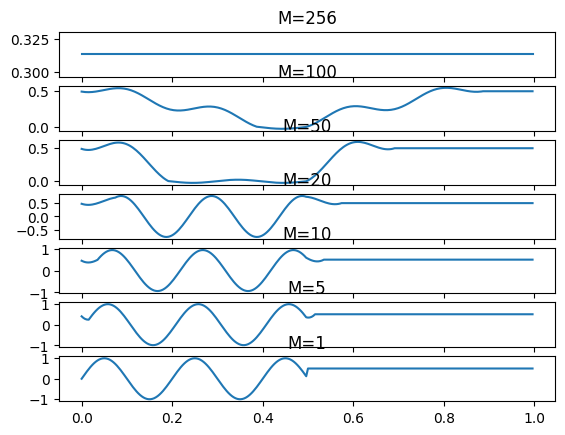

In [5]:
fig, axs = plt.subplots(len(Ms))

for i, [M, c] in enumerate(resultados):
  axs[i].plot(t, c)
  axs[i].set_title(f'M={M}')


A convolução com v funciona como um filtro. Olhando o caso mais acima, vemos que resta apenas uma linha, isso acontece pois é realizada a média da função sobre seu período inteiro, gerando esse único valor. Conforme reduzimos o valor de M, reduzimos a janela da média e o formato da função vai tornando-se mais claro, até chegar a M=1, em que ela apenas reproduz o formato exato de f.

# Exercício 4.13


In [6]:
h = [1,2,7,1]
H = fft(h)
Mh = circulant(h)
autovalores, autovetores = np.linalg.eig(Mh)
H_ordenado = np.sort(H)
AV_ordenados = np.sort(autovalores)
for i in range(len(h)):
  print(f"Diferença: {H_ordenado[i] - AV_ordenados[i]}")



Diferença: (-1.7763568394002505e-15+2.220446049250313e-16j)
Diferença: (-1.7763568394002505e-15-2.220446049250313e-16j)
Diferença: (1.7763568394002505e-15-0j)
Diferença: -0j
